#LeNet-5 Model

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd
import time

In [2]:
(train_X, train_Y_orig), (test_X, test_Y_orig) = tf.keras.datasets.mnist.load_data()
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))/255
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))/255
train_Y = tf.one_hot(train_Y_orig,10)
test_Y = tf.one_hot(test_Y_orig,10)

print(train_X.shape,train_Y.shape)
print(test_X.shape,test_Y.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [3]:
def LeNet5(input_size=(28,28,1)):
    inputs=tf.keras.Input(input_size)
    X = tf.keras.layers.Conv2D(filters=6,kernel_size=(5,5))(inputs)
    X = tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=2)(X)
    X = tf.keras.layers.Conv2D(filters=16,kernel_size=(5,5))(X)
    X = tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=2)(X)
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(units=120,activation='relu')(X)
    X = tf.keras.layers.Dense(units=10,activation='softmax')(X)
    model = tf.keras.Model(inputs=inputs,outputs=X)
    return model

Epoch 1/15
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2632 - accuracy: 0.9213
Epoch 2/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1160 - accuracy: 0.9648
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0909 - accuracy: 0.9722
Epoch 4/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0764 - accuracy: 0.9763
Epoch 5/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0680 - accuracy: 0.9790
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0598 - accuracy: 0.9811
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0529 - accuracy: 0.9836
Epoch 8/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0487 - accuracy: 0.9845
Epoch 9/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0448 - accuracy: 0.9857
Epoch 10/15
1875/1875 [==============================] - 27s 14m

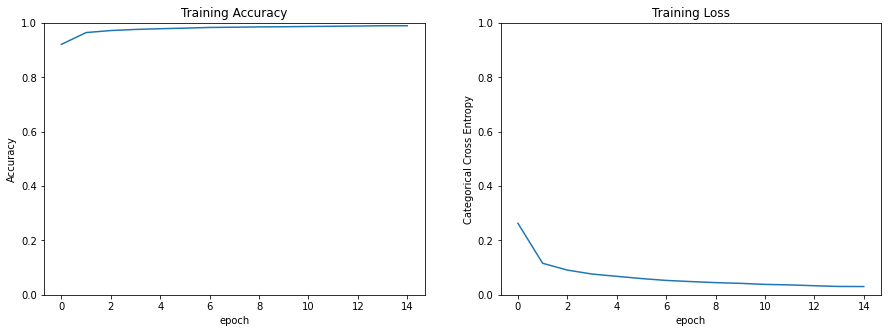

In [4]:
model = LeNet5()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
start = time.time()
history=model.fit(train_X,train_Y,epochs=15)
end = time.time()
print("Time taken (s) : "+str(end-start))
loss=history.history['loss']
accuracy=history.history['accuracy']

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.ylim([0,1])
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.ylabel('Categorical Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0     

In [6]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 2s 7ms/step - loss: 0.0764 - accuracy: 0.9805


[0.07644567638635635, 0.9804999828338623]

In [7]:
print(model.trainable_variables) 

[<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 6) dtype=float32, numpy=
array([[[[ 0.31559932,  0.00837841, -0.11516135,  0.03512171,
          -0.10558887, -0.09562019]],

        [[-0.09526927,  0.22555688,  0.07865013,  0.30739754,
          -0.16660471,  0.09189188]],

        [[-0.21504018,  0.11314023, -0.01457228,  0.10700383,
           0.0459069 ,  0.15657462]],

        [[ 0.03616227,  0.11334953,  0.2508543 , -0.08374023,
           0.22496831, -0.11835971]],

        [[-0.07681537,  0.01610569,  0.14564182, -0.07379767,
           0.23615855, -0.12605049]]],


       [[[ 0.07511553, -0.15331021, -0.09393115,  0.22830895,
          -0.03686717,  0.22077158]],

        [[-0.03712001,  0.38486153,  0.08249596,  0.20724547,
          -0.04334276,  0.28464335]],

        [[-0.39119613,  0.2943546 ,  0.12347782, -0.07561173,
           0.17444691,  0.17559554]],

        [[-0.08070935,  0.35556242, -0.16662656, -0.04865557,
           0.11390617,  0.07627843]],

        [[ 0.083